The following are key descriptions of analytic scores that are being used to hopefully identify key behavioural archetypes within the wallet data:

 - **Behavioural Volatility Score**: The Behavioural Volatility Score quantifies how variable or erratic a wallet's transaction behavior is over time. It measures the inconsistency in transaction amounts and timing for each wallet. High scores indicate wallets with irregular, unpredictable activity, while low scores suggest regular, stable transaction patterns. The score is typically derived using statistical analysis of transaction histories, such as calculating the standard deviation or other measures of dispersion in transaction frequency and amounts. This helps identify users whose behavior deviates from the norm, which can be useful for segmentation, risk assessment, or anomaly detection. 

- **Revenue Proxy Score**: estimates the potential revenue contribution of each wallet by combining several aspects of user activity. It is calculated as a weighted sum of three main components: transaction activity (frequency of transactions multiplied by their average value), DEX/DeFi engagement (the number of decentralized exchange and DeFi events, weighted by average transfer value), and bridge activity (the total volume transferred via bridges). By aggregating these factors, the score highlights wallets that are likely to be high-value users based on their transaction patterns and engagement with DeFi and cross-chain services.

- **Cross Domain Engagement Score**: The cross domain engagement score is a metric that quantifies how diversely a cryptocurrency wallet interacts across different event types or domains. It is calculated using Shannon entropy, which measures the unpredictability or diversity of event participation for each wallet. A score near 1 means the wallet's activity is evenly spread across many event types (high engagement diversity). A score near 0 means the wallet's activity is concentrated in few or just one event type (low engagement diversity)

- **Interaction Mode Score**: A median value is produced for each of DEX_EVENTS, CEX_EVENTS, BRIDGE_EVENTS and DEFI_EVENTS from clustering results where a cluster median for each feature is selected from the most prominant cluster for that event type. The distance score measures how much a wallet's behavior deviates from the median, after normalizing for feature variability and weighting by the wallet's activity profile. A higher score means the wallet acts more unusually compared to typical behavior, with the score reflecting both the size and importance of these differences. The typical behaviour being a value of an EVENT feature engagement that is prominant and high.

- **Activity-Based Clustering (UMAP + HDBSCAN)**: Groups wallets into clusters based on their activity patterns using a two-step pipeline: UMAP for dimensionality reduction and HDBSCAN for density-based clustering. This model reveals natural groupings or archetypes in the user base, helping to identify segments with similar behaviors. 


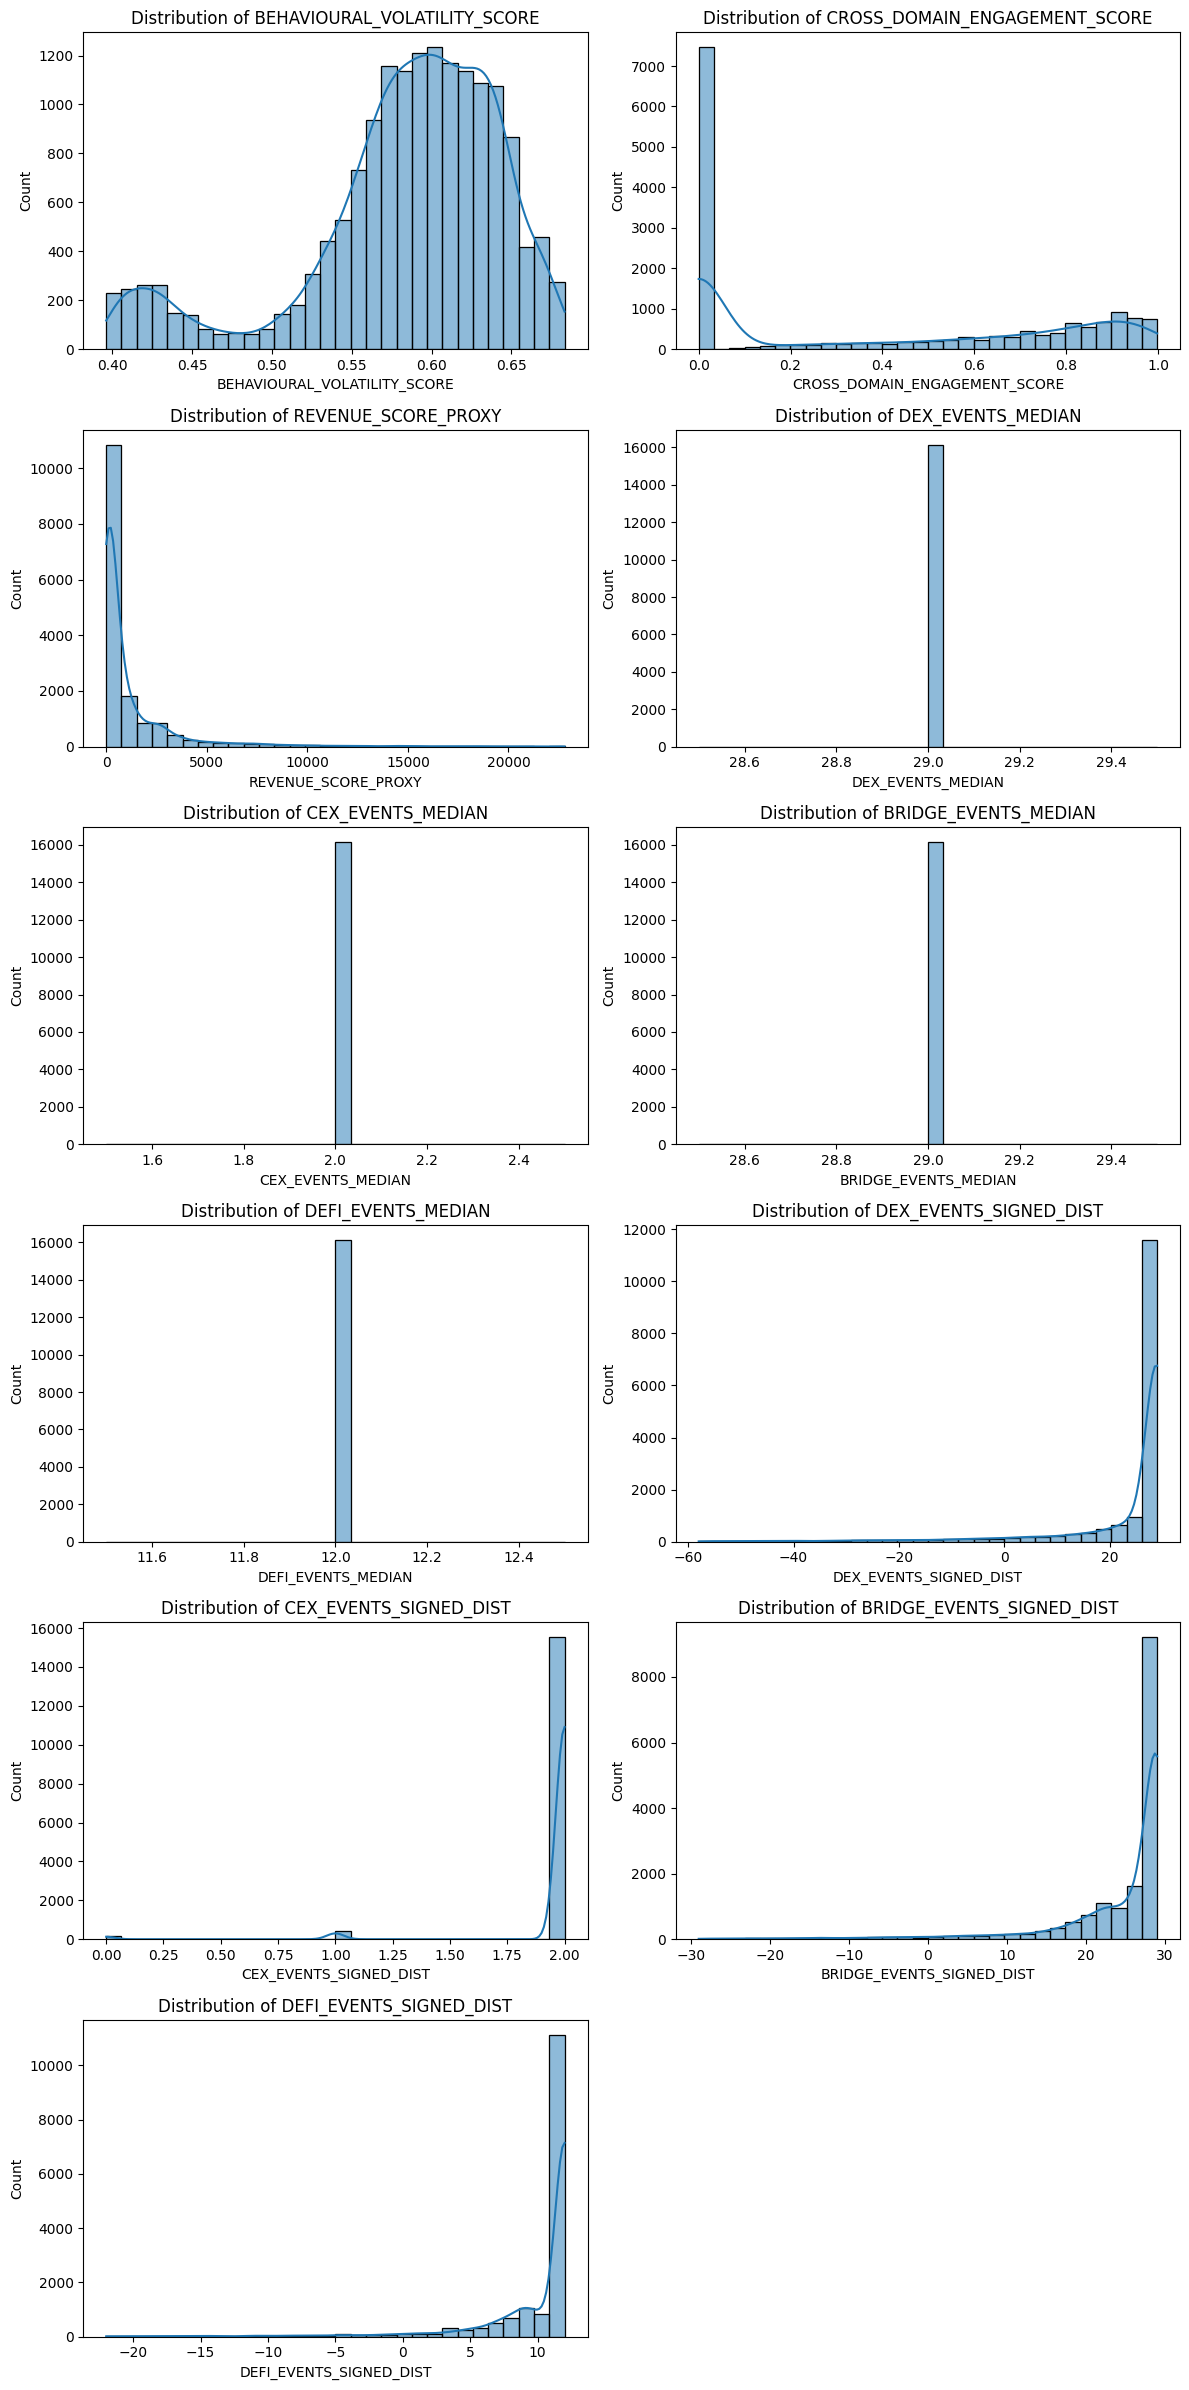

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_score_distributions(df, score_cols, bottom_percentile=0, top_percentile=100):
    """
    Plots distributions for each analytic score column, with optional exclusion of bottom/top percentiles.
    """
    df_scores = df[score_cols].copy()
    # Remove bottom/top percentiles if specified
    if bottom_percentile > 0 or top_percentile < 100:
        for col in score_cols:
            low = np.percentile(df_scores[col], bottom_percentile)
            high = np.percentile(df_scores[col], top_percentile)
            df_scores = df_scores[(df_scores[col] >= low) & (df_scores[col] <= high)]
    num_cols = len(score_cols)
    fig, axes = plt.subplots(nrows=(num_cols + 1) // 2, ncols=2, figsize=(12, 4 * ((num_cols + 1) // 2)))
    axes = axes.flatten()
    for i, col in enumerate(score_cols):
        sns.histplot(df_scores[col], ax=axes[i], kde=True, bins=30)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
    plt.show()

# Load the data
scores_path = '../data/processed_data/merged_analytic_scores.csv'
df = pd.read_csv(scores_path)
# Get all columns after 'activity_cluster_label'
start_col = df.columns.get_loc('activity_cluster_label') + 1
score_cols = df.columns[start_col:]

# Example usage: exclude bottom 1% and top 99%
plot_score_distributions(df, score_cols, bottom_percentile=2.5, top_percentile=97.5)
# To plot all data, use: plot_score_distributions(df, score_cols)


--- Cluster 1 (11390 wallets) ---


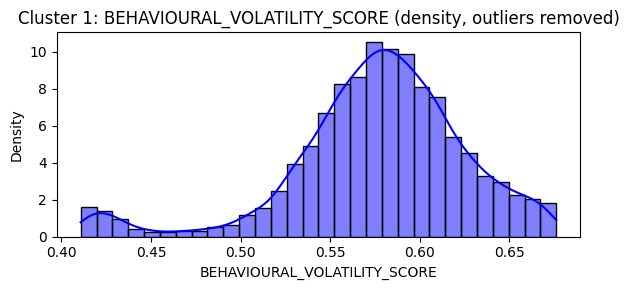

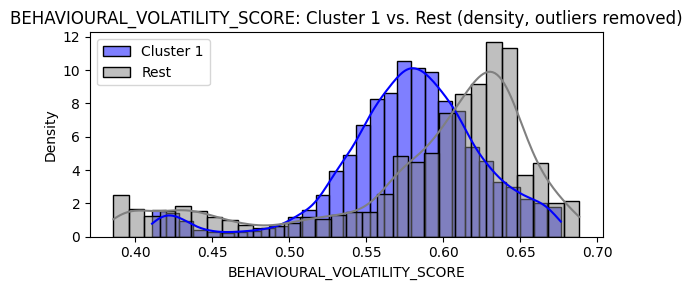

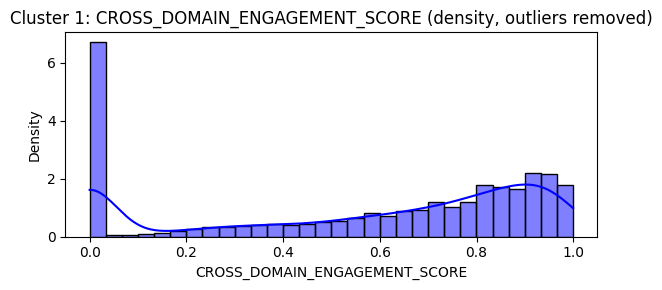

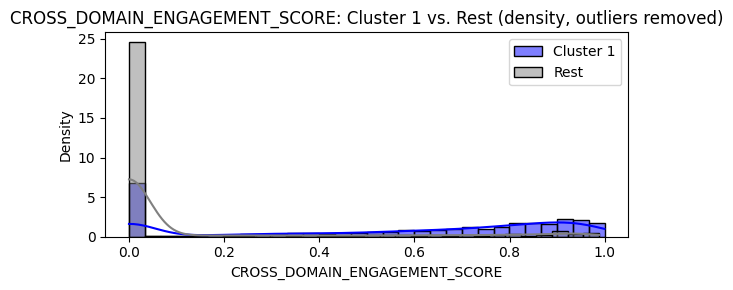

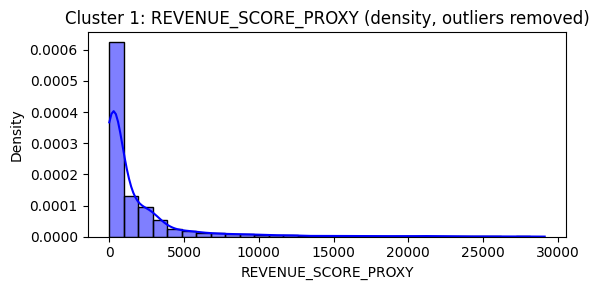

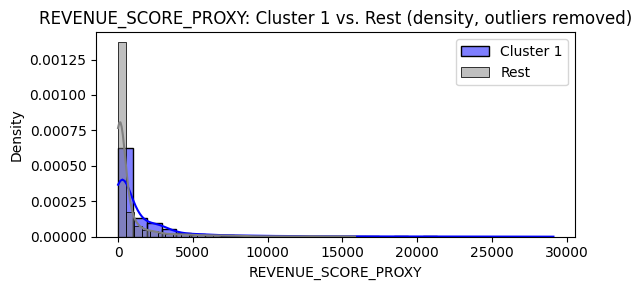

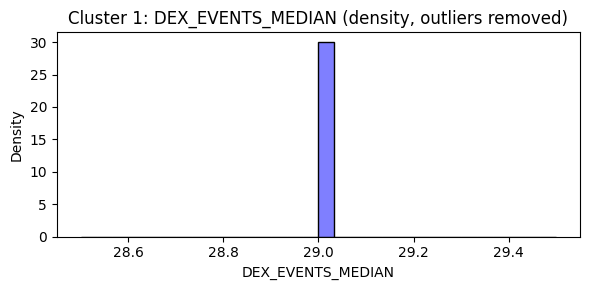

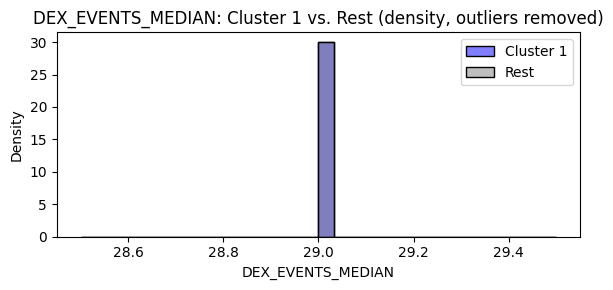

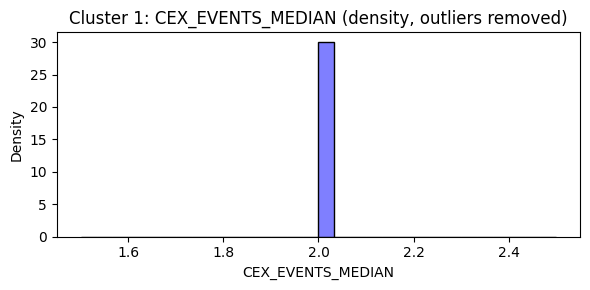

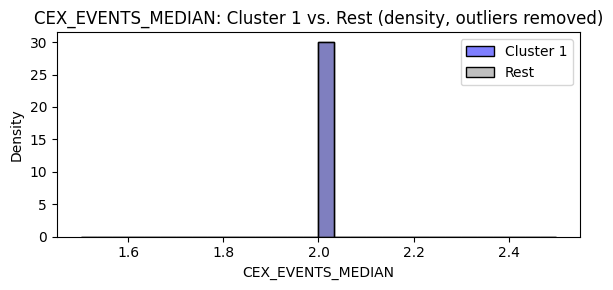

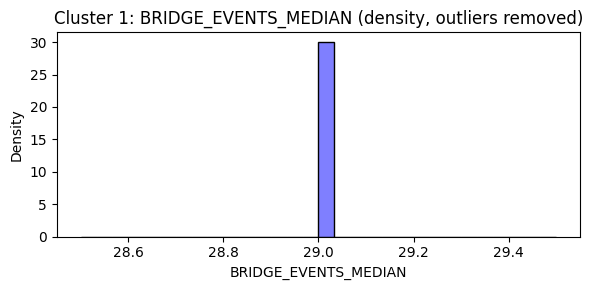

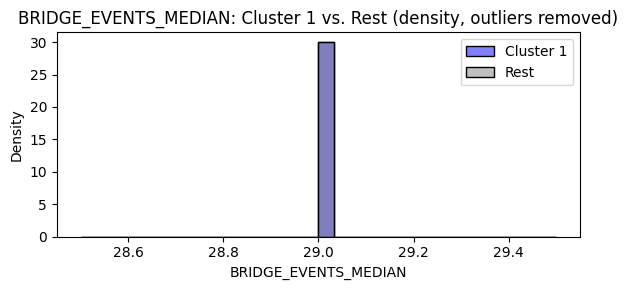

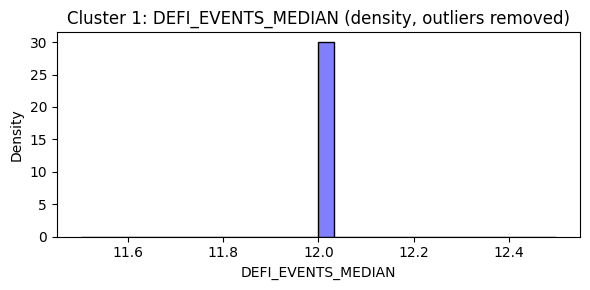

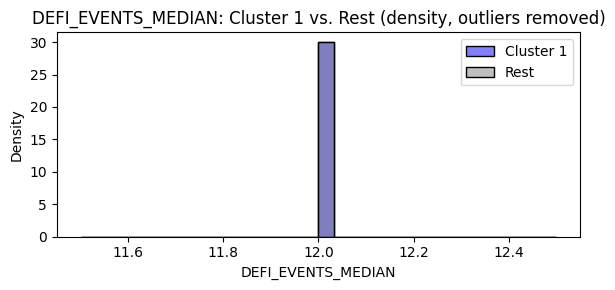

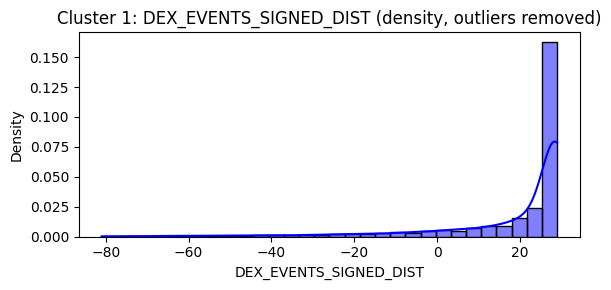

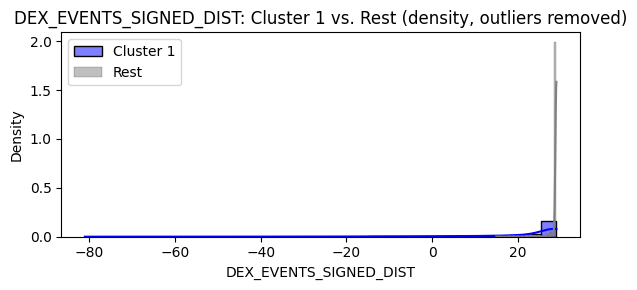

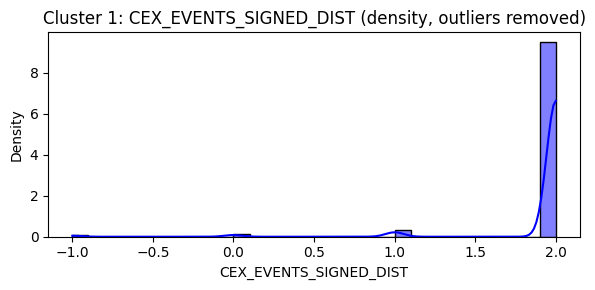

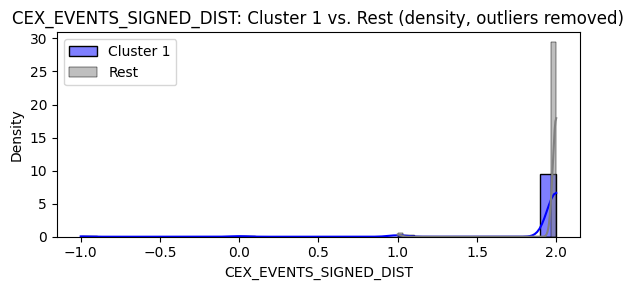

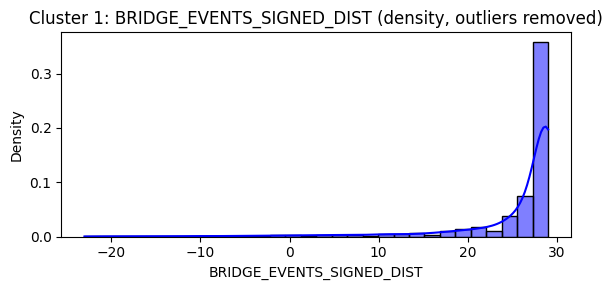

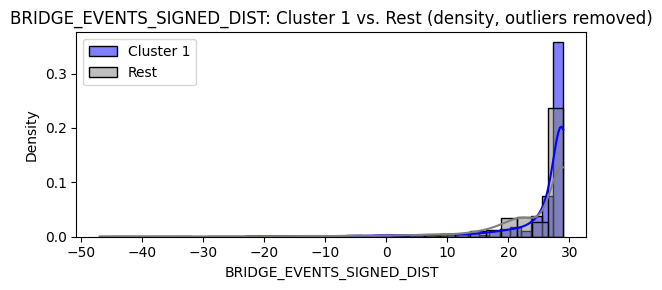

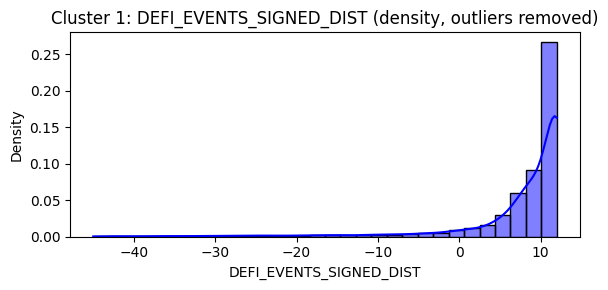

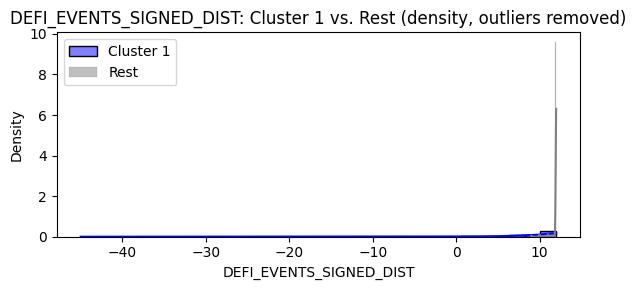


--- Cluster 0 (8713 wallets) ---


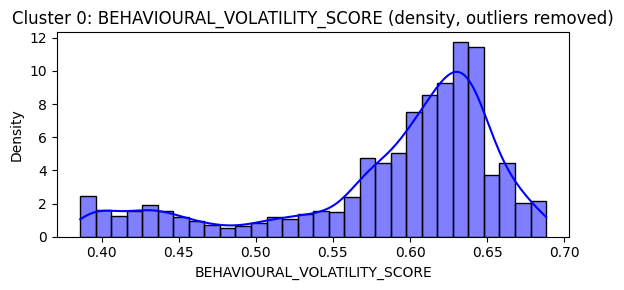

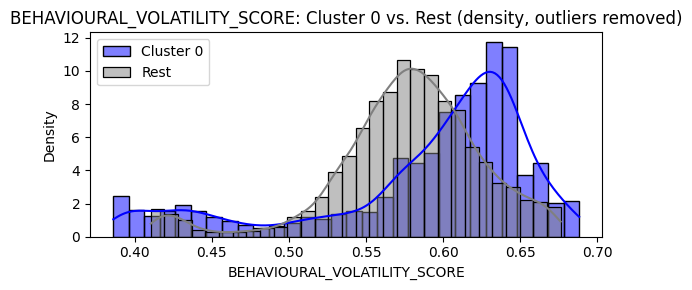

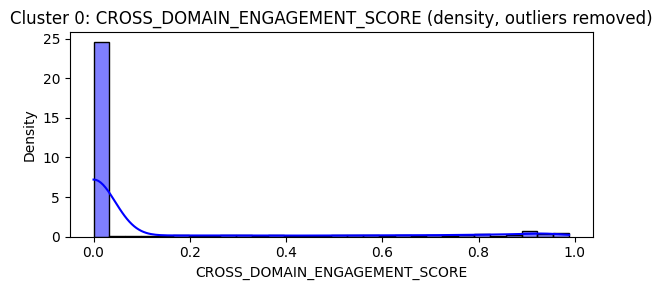

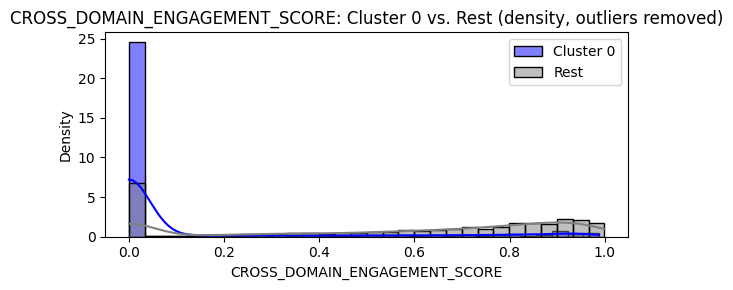

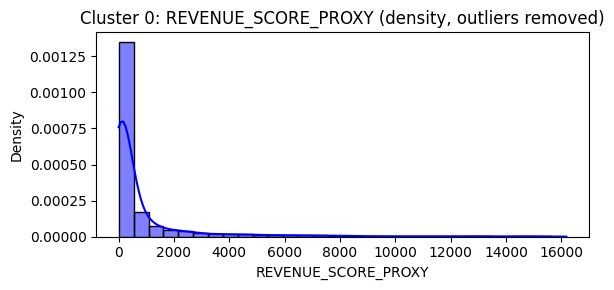

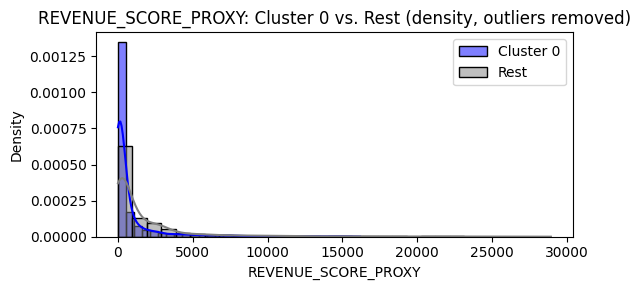

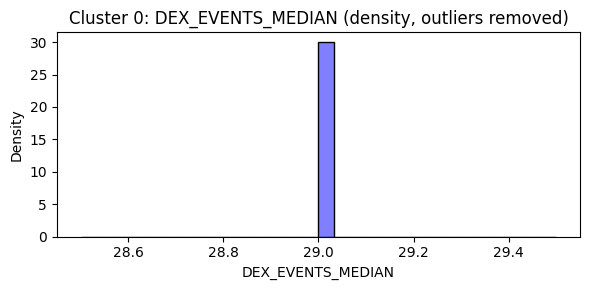

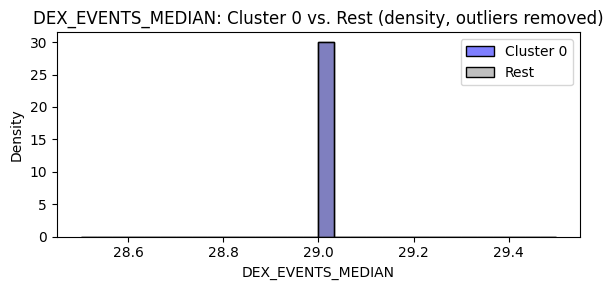

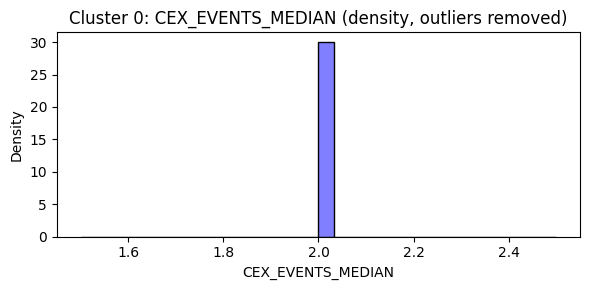

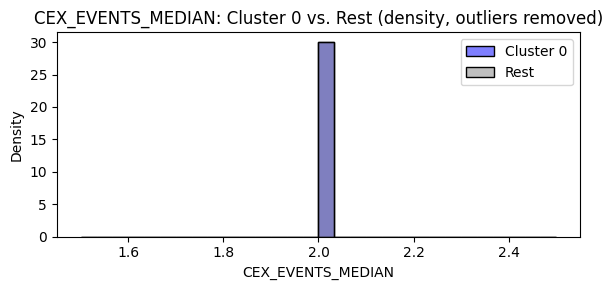

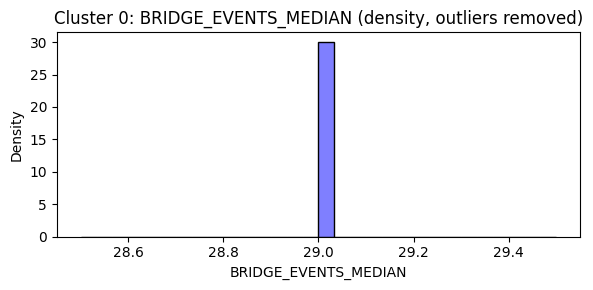

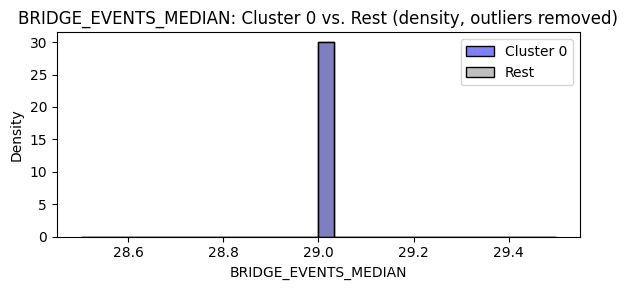

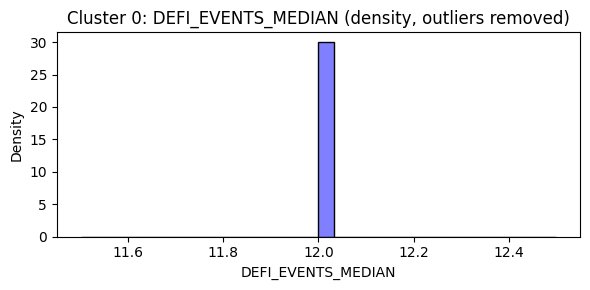

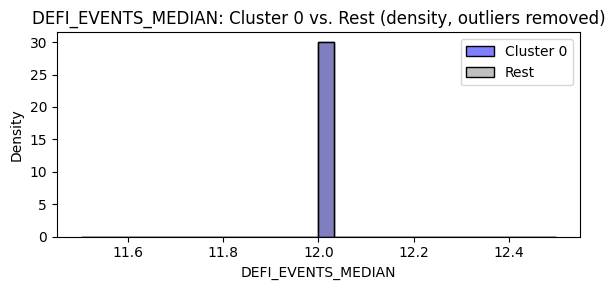

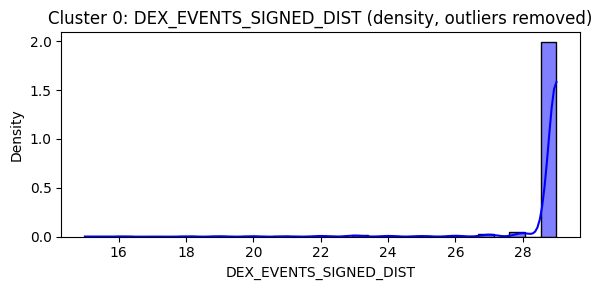

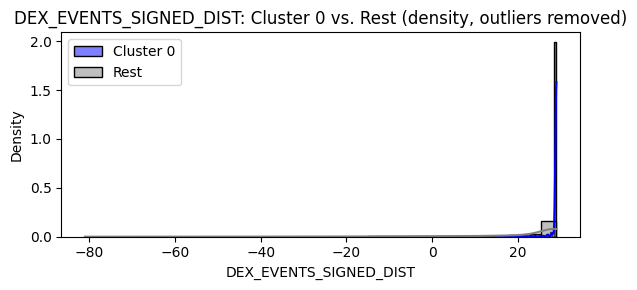

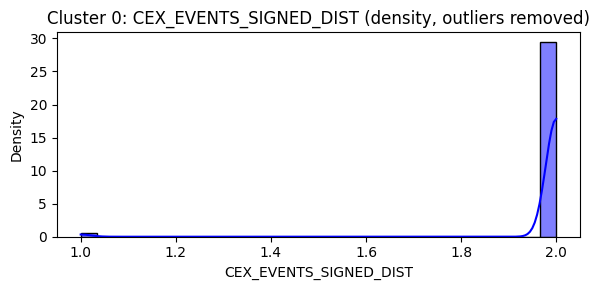

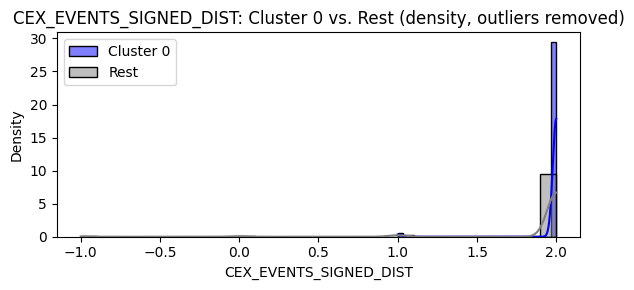

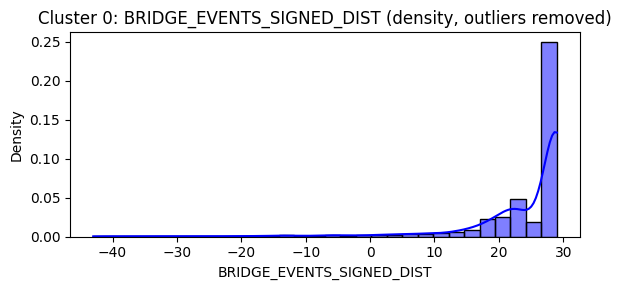

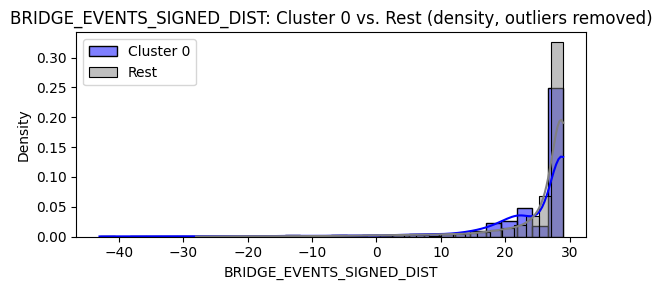

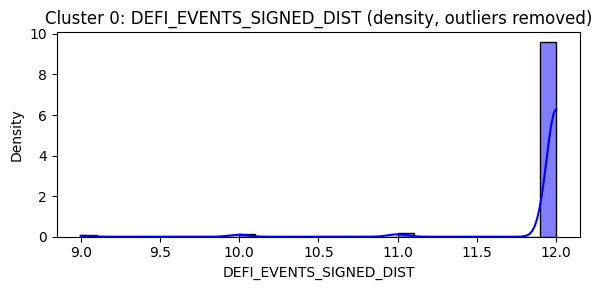

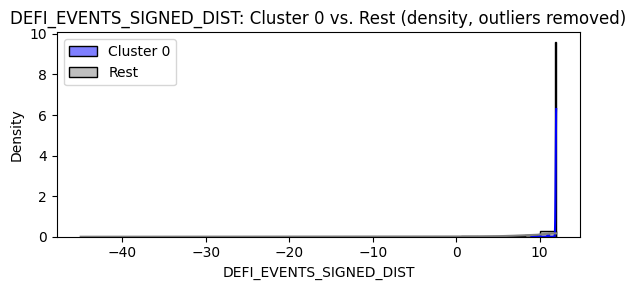


--- Cluster -1 (71 wallets) ---


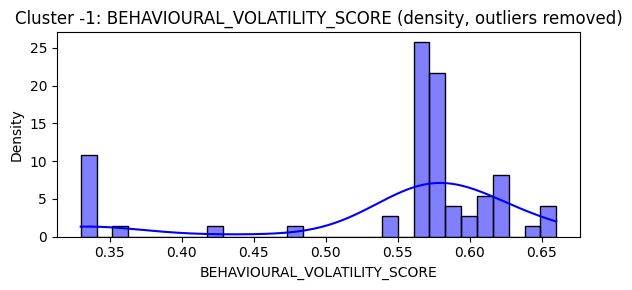

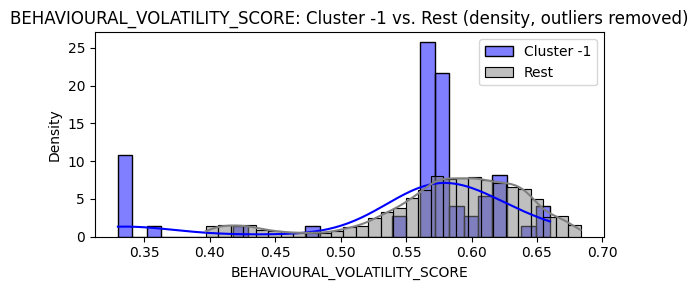

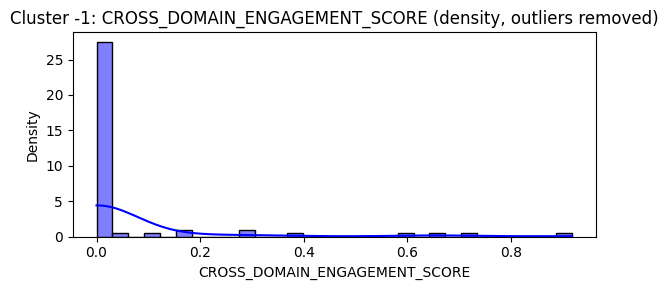

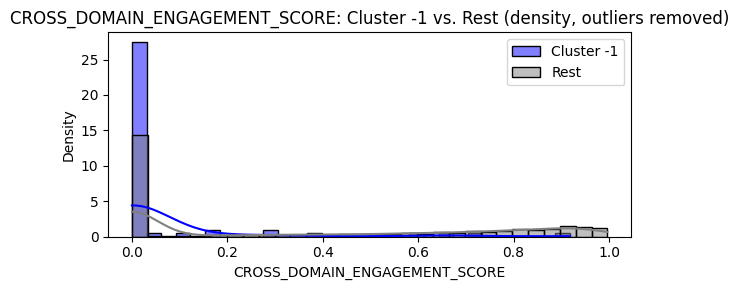

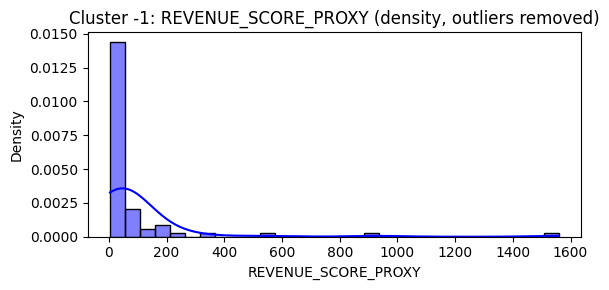

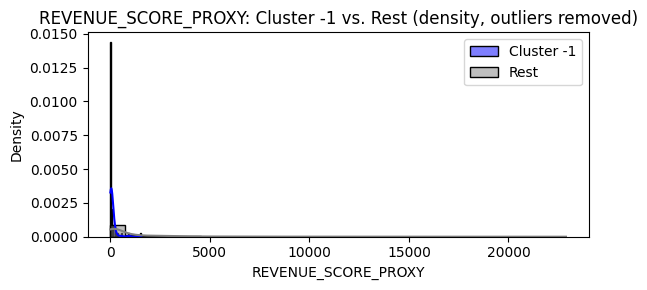

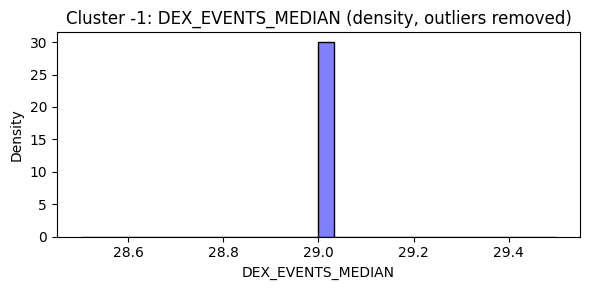

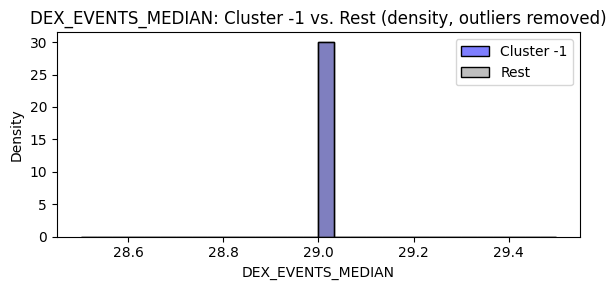

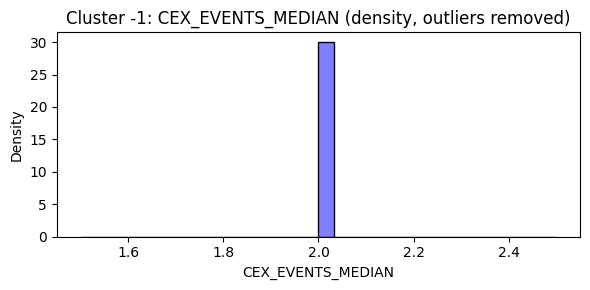

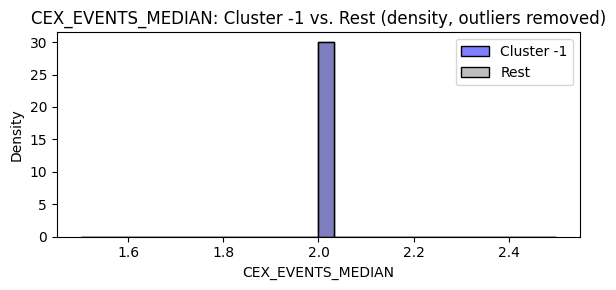

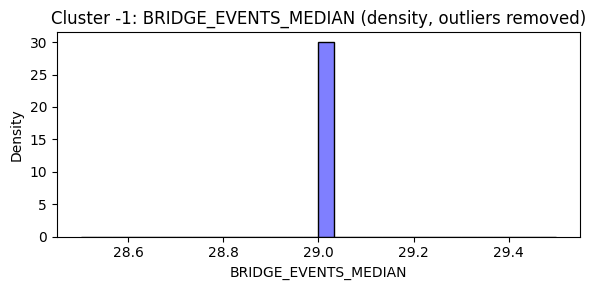

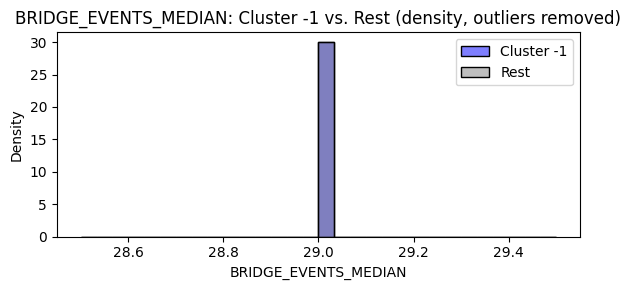

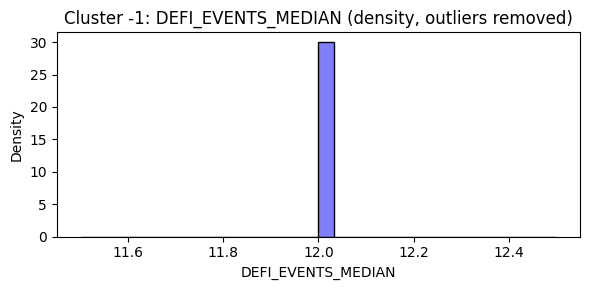

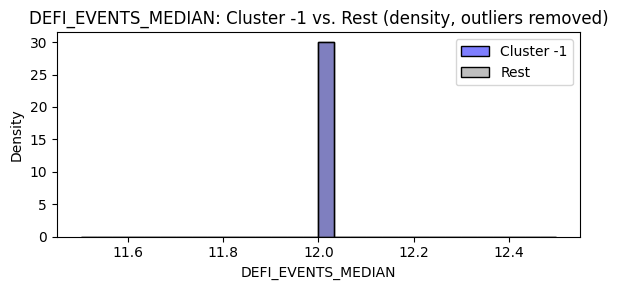

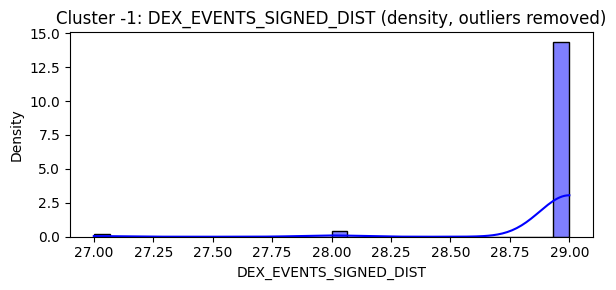

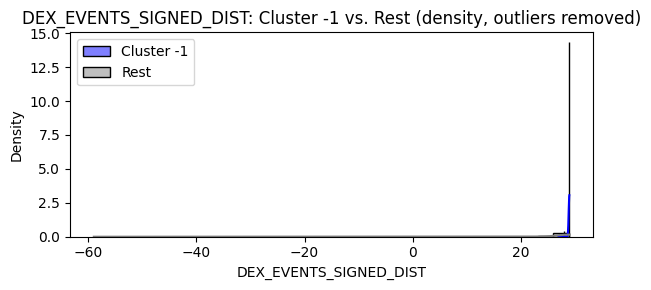

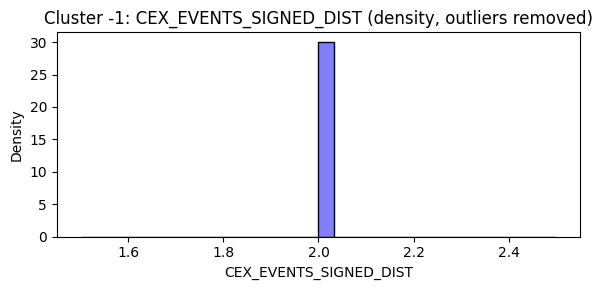

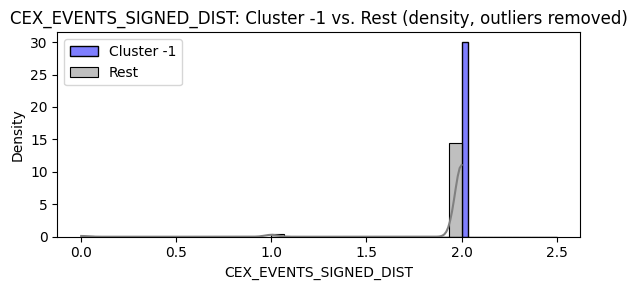

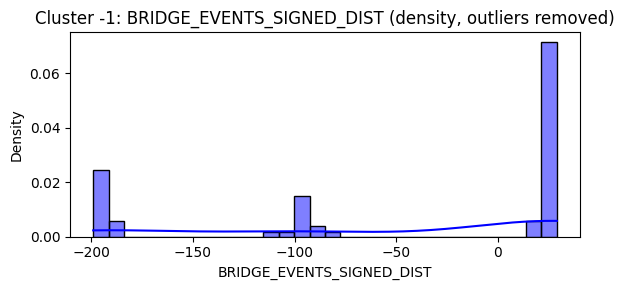

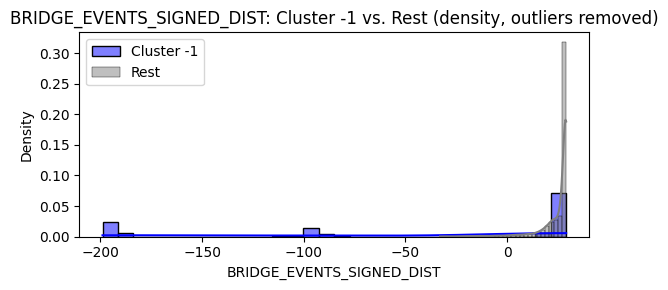

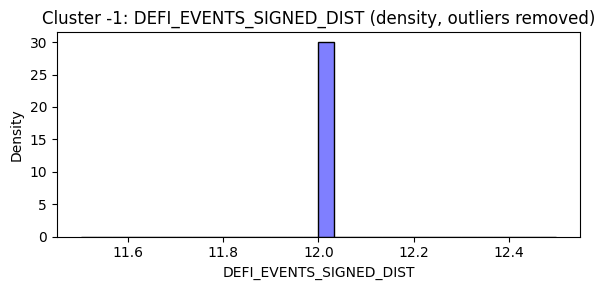

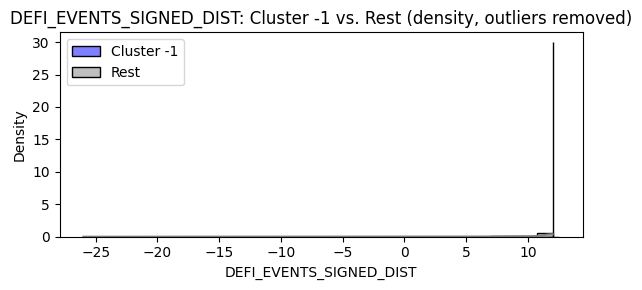

In [42]:
# Cluster-Specific Analytic Score Visualisations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_cluster_score_distributions(df, cluster_col, score_cols, bottom_percentile=2.5, top_percentile=97.5):
    """
    For each cluster, plot:
      1. Distribution of each analytic score for that cluster only.
      2. Overlayed density plot: cluster vs. all other wallets.
    """
    clusters = df[cluster_col].unique()
    for cluster in clusters:
        cluster_df = df[df[cluster_col] == cluster]
        rest_df = df[df[cluster_col] != cluster]
        print(f'\n--- Cluster {cluster} ({len(cluster_df)} wallets) ---')
        for col in score_cols:
            # Trim percentiles for both cluster and rest
            c_low, c_high = np.percentile(cluster_df[col], bottom_percentile), np.percentile(cluster_df[col], top_percentile)
            r_low, r_high = np.percentile(rest_df[col], bottom_percentile), np.percentile(rest_df[col], top_percentile)
            cluster_trimmed = cluster_df[(cluster_df[col] >= c_low) & (cluster_df[col] <= c_high)][col]
            rest_trimmed = rest_df[(rest_df[col] >= r_low) & (rest_df[col] <= r_high)][col]

            # 1. Distribution for cluster only
            plt.figure(figsize=(6,3))
            sns.histplot(cluster_trimmed, kde=True, bins=30, stat='density', color='blue')
            plt.title(f'Cluster {cluster}: {col} (density, outliers removed)')
            plt.xlabel(col)
            plt.ylabel('Density')
            plt.tight_layout()
            plt.show()

            # 2. Overlay: cluster vs. rest
            plt.figure(figsize=(6,3))
            sns.histplot(cluster_trimmed, kde=True, bins=30, stat='density', color='blue', label=f'Cluster {cluster}')
            sns.histplot(rest_trimmed, kde=True, bins=30, stat='density', color='grey', label='Rest', alpha=0.5)
            plt.title(f'{col}: Cluster {cluster} vs. Rest (density, outliers removed)')
            plt.xlabel(col)
            plt.ylabel('Density')
            plt.legend()
            plt.tight_layout()
            plt.show()

# Example usage:
cluster_col = 'activity_cluster_label'
# Use same score_cols as in previous cell (after 'activity_cluster_label')
start_col = df.columns.get_loc(cluster_col) + 1
score_cols = df.columns[start_col:]
plot_cluster_score_distributions(df, cluster_col, score_cols)

**IMPORTANT HERE - MAY WANT TO PRODUCE THE SAME VISUALISATIONS AS THE ABOVE BUT DENSITY BASED WITH OVERLAYS TO SHOW DIFFERENCES WITH THE ACTIVITY BASED CLUSTERING - THE ONLY CLEAR WAY TO SEE IF ANY PATTERNS ARE THERE IN RELATION TO THE ANALYTIC SCORES COMBINED WITH THIS ACTIVITY BASED CLUSTERING**

All visualisations below use density (rather than count) on the y-axis. Density plots show the proportion of data in each bin, making it easier to compare distributions between groups of different sizes. This is especially useful here, as the 'stable high-value trader' group is much smaller than the rest of the dataset, so comparing densities rather than raw counts gives a fairer view of how the distributions differ.

Stable high-value traders: 1034 wallets (5.1% of total)


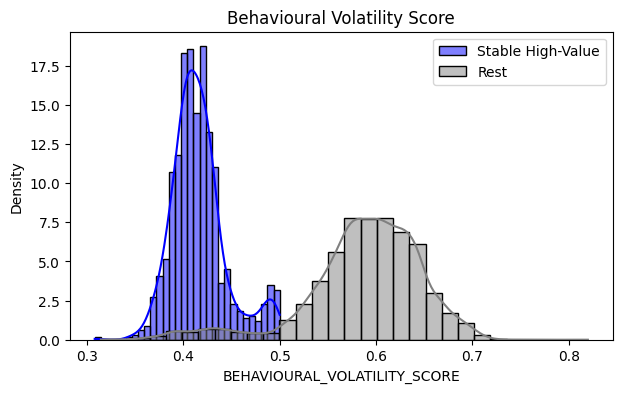

Stable high-value traders: 1034 wallets (5.1% of total)


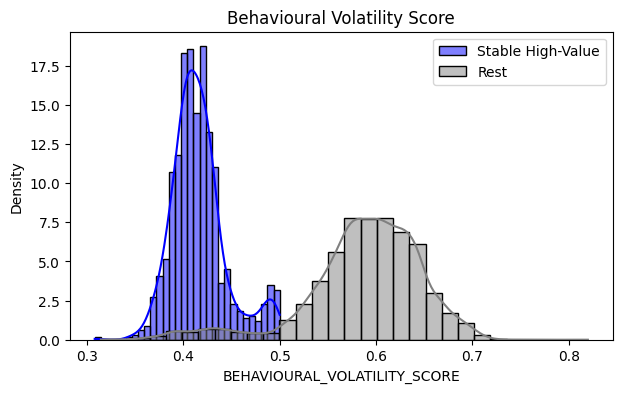

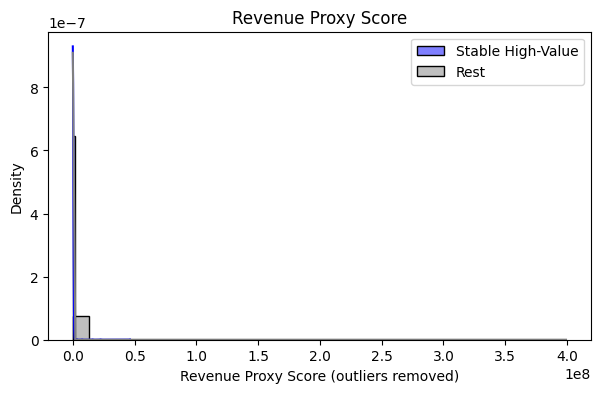

Stable high-value traders: 1034 wallets (5.1% of total)


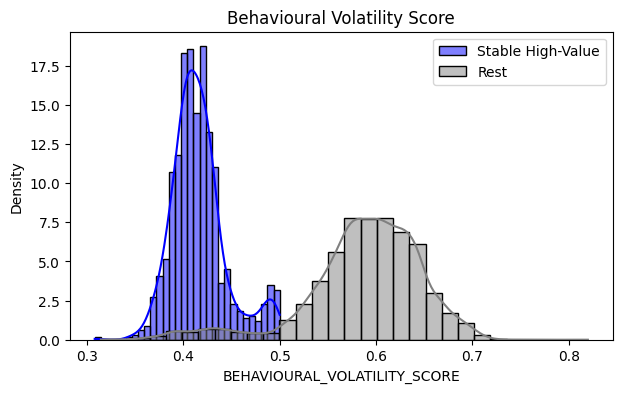

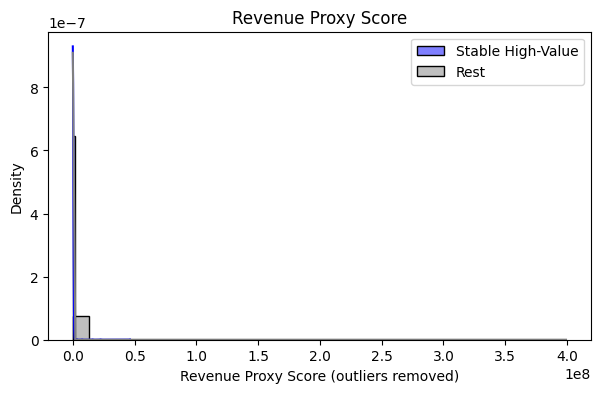

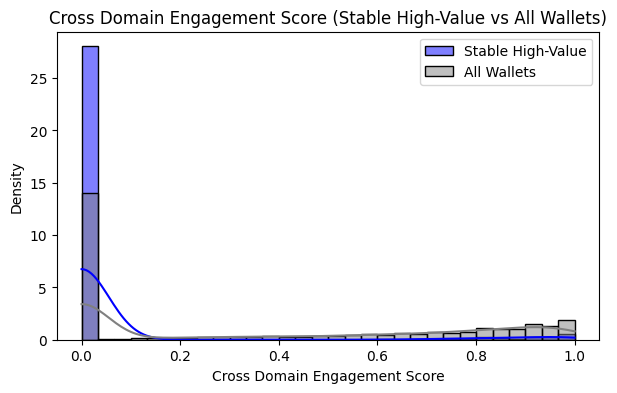

Stable high-value traders: 1034 wallets (5.1% of total)


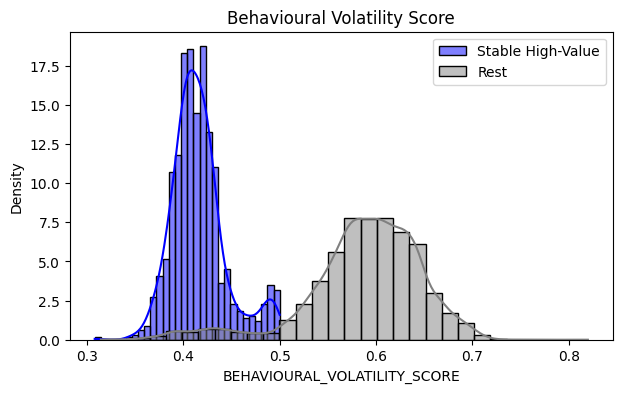

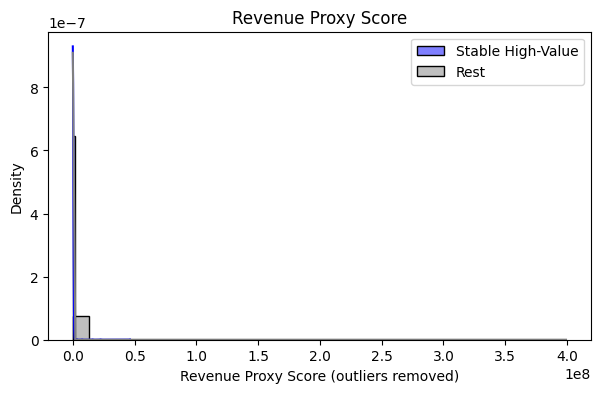

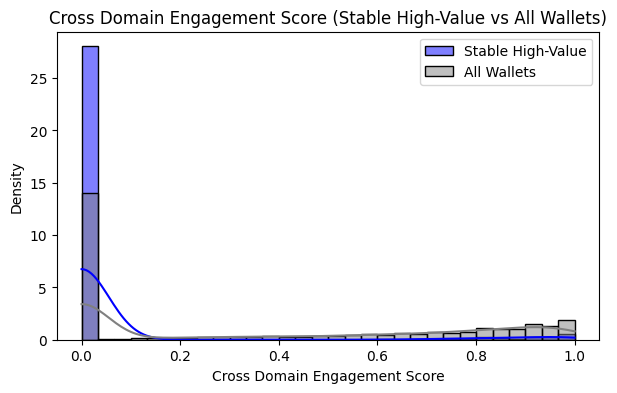

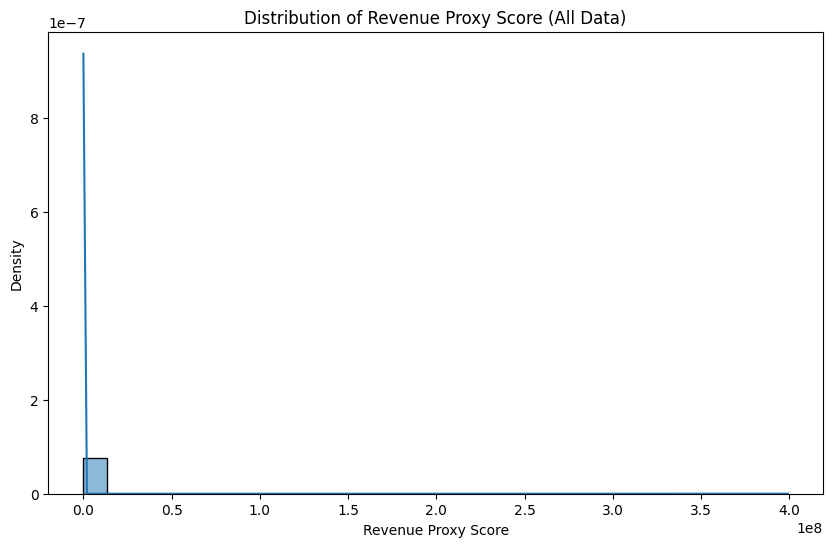

Stable high-value traders: 1034 wallets (5.1% of total)


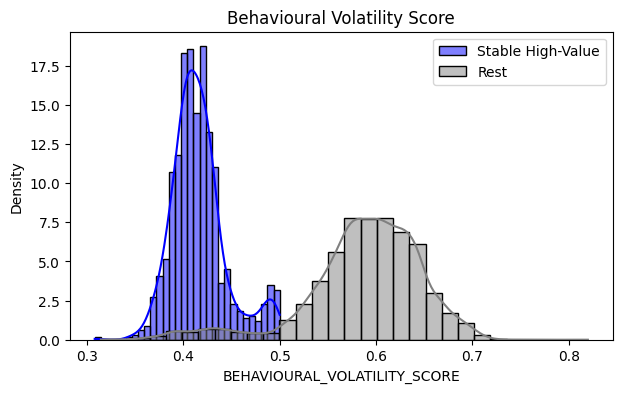

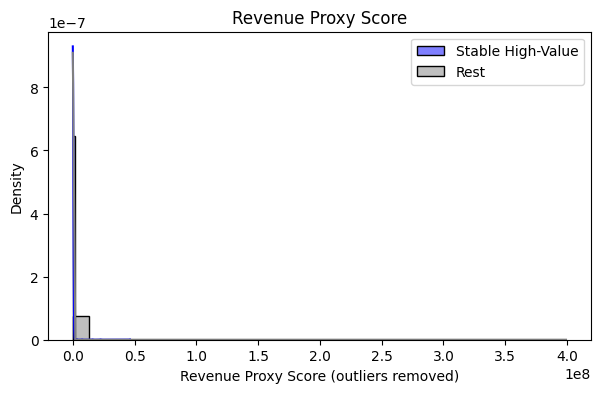

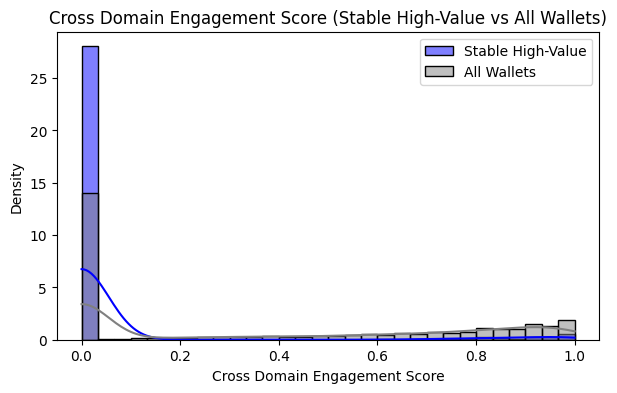

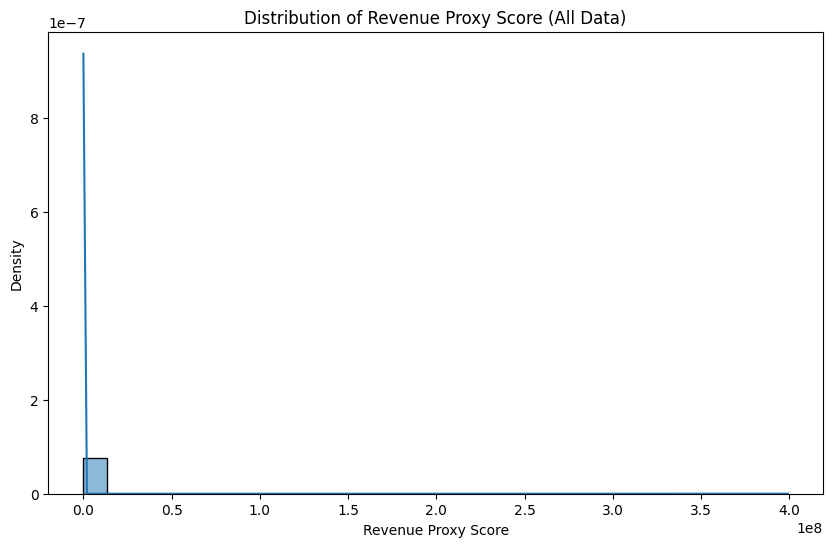

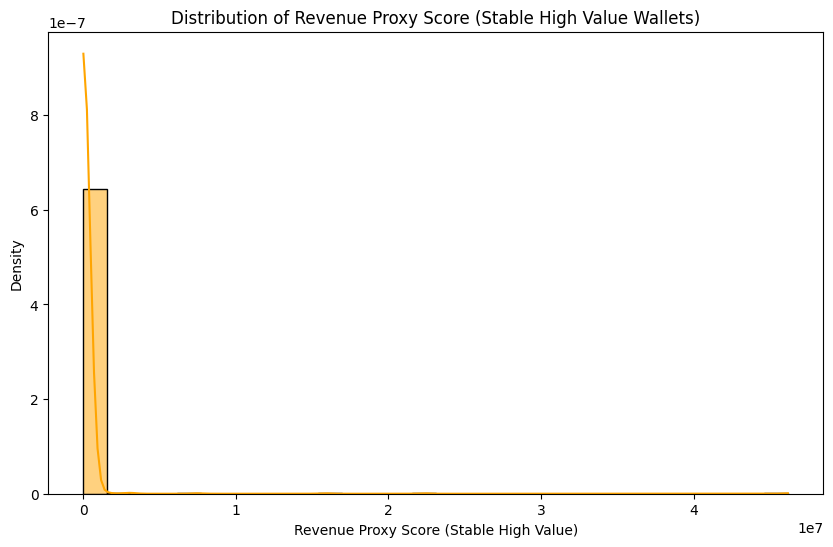

In [41]:
# Identify 'stable high-value traders' and compare to rest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_group_comparison(data1, data2, col, label1, label2, title, xlabel=None, bottom_percentile=0, top_percentile=100, stat='density'):
    """
    Plots two distributions for a given column, with optional exclusion of bottom/top percentiles.
    """
    d1 = data1[col]
    d2 = data2[col]
    if bottom_percentile > 0 or top_percentile < 100:
        low1 = np.percentile(d1, bottom_percentile)
        high1 = np.percentile(d1, top_percentile)
        d1 = d1[(d1 >= low1) & (d1 <= high1)]
        low2 = np.percentile(d2, bottom_percentile)
        high2 = np.percentile(d2, top_percentile)
        d2 = d2[(d2 >= low2) & (d2 <= high2)]
    plt.figure(figsize=(7,4))
    sns.histplot(d1, color='blue', kde=True, bins=30, label=label1, stat=stat)
    sns.histplot(d2, color='grey', kde=True, bins=30, label=label2, stat=stat, alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel if xlabel else col)
    plt.ylabel('Count' if stat=='count' else 'Density')
    plt.legend()
    plt.show()

# Define score columns
vol_col = 'BEHAVIOURAL_VOLATILITY_SCORE'
rev_col = 'REVENUE_SCORE_PROXY'
cross_col = 'CROSS_DOMAIN_ENGAGEMENT_SCORE'
im_dist_cols = [col for col in df.columns if col.endswith('_NORM_DIST')]


#**MAYBE ISSUE WITH REVENUE IS THE DIMENSIONS OF THE Y AND X AXIS?? - EXPLORE THIS**

# Calculate thresholds
vol_thresh = 0.5  # Set volatility threshold to 0.5
rev_thresh = np.percentile(df[rev_col], 75)  # Set revenue threshold to 90th percentile

# Select group: volatility < 0.5, high revenue
stable_high_value = df[(df[vol_col] < vol_thresh) & (df[rev_col] >= rev_thresh)]
rest = df[~((df[vol_col] < vol_thresh) & (df[rev_col] >= rev_thresh))]

print(f"Stable high-value traders: {len(stable_high_value)} wallets ({len(stable_high_value)/len(df)*100:.1f}% of total)")

# Example: Remove top and bottom 1% outliers for all plots
bottom_percentile = 0
top_percentile = 100

# 1. Distribution of volatility (comparison)
plot_group_comparison(stable_high_value, rest, vol_col, 'Stable High-Value', 'Rest', 'Behavioural Volatility Score', bottom_percentile=bottom_percentile, top_percentile=top_percentile)

# 2. Distribution of revenue (comparison) - use density on y-axis
plot_group_comparison(stable_high_value, rest, rev_col, 'Stable High-Value', 'Rest', 'Revenue Proxy Score', xlabel='Revenue Proxy Score (outliers removed)', bottom_percentile=bottom_percentile, top_percentile=top_percentile, stat='density')

# 3. Cross Domain Engagement Score: compare group to whole dataset
plot_group_comparison(stable_high_value, df, cross_col, 'Stable High-Value', 'All Wallets', 'Cross Domain Engagement Score (Stable High-Value vs All Wallets)', xlabel='Cross Domain Engagement Score', bottom_percentile=bottom_percentile, top_percentile=top_percentile)

# 4. Interaction Mode Distance Scores: compare group vs rest
for col in im_dist_cols:
    plot_group_comparison(stable_high_value, rest, col, 'Stable High-Value', 'Rest', f'{col} (Stable High-Value vs Rest)', bottom_percentile=bottom_percentile, top_percentile=top_percentile)